<img src='11.jpg'>

In [23]:
#pip install pycaret

In [1]:
import pandas as pd

In [2]:
#Classification

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [17]:
from pycaret.classification import*

In [18]:
setup(df,target='smoking')

,Description,Value
0,Session id,4921
1,Target,smoking
2,Target type,Binary
3,Original data shape,"(159256, 24)"
4,Transformed data shape,"(159256, 24)"
5,Transformed train set shape,"(111479, 24)"
6,Transformed test set shape,"(47777, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7810,0.8645,0.8133,0.7214,0.7646,0.5612,0.5647,5.9530
xgboost,Extreme Gradient Boosting,0.7796,0.8637,0.8045,0.7229,0.7615,0.5578,0.5606,1.8780
gbc,Gradient Boosting Classifier,0.7751,0.8593,0.8154,0.7122,0.7603,0.5504,0.5549,29.6510
rf,Random Forest Classifier,0.7735,0.8560,0.8016,0.7151,0.7559,0.5459,0.5490,28.1650
et,Extra Trees Classifier,0.7688,0.8513,0.8101,0.7052,0.7540,0.5379,0.5426,18.8880
ada,Ada Boost Classifier,0.7685,0.8516,0.7843,0.7143,0.7477,0.5346,0.5366,7.3540
lda,Linear Discriminant Analysis,0.7499,0.8325,0.7602,0.6960,0.7267,0.4970,0.4986,0.5430
ridge,Ridge Classifier,0.7498,0.0000,0.7594,0.6961,0.7264,0.4966,0.4983,0.1970
qda,Quadratic Discriminant Analysis,0.7358,0.7999,0.8095,0.6620,0.7282,0.4762,0.4856,0.5550
lr,Logistic Regression,0.7257,0.8043,0.6659,0.6944,0.6798,0.4401,0.4404,5.2400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4921, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [20]:
best_model=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7823,0.8658,0.8185,0.7213,0.7668,0.5642,0.5681
1,0.7815,0.8645,0.8082,0.7241,0.7639,0.5617,0.5646
2,0.7891,0.8691,0.8179,0.7316,0.7723,0.5771,0.5802
3,0.7868,0.8690,0.8201,0.7272,0.7709,0.5728,0.5765
4,0.7752,0.8628,0.8093,0.7146,0.7590,0.5499,0.5536
5,0.7794,0.8641,0.8150,0.7185,0.7637,0.5584,0.5623
6,0.7760,0.8604,0.8078,0.7163,0.7593,0.5513,0.5548
7,0.7766,0.8615,0.8111,0.7160,0.7606,0.5528,0.5566
8,0.7826,0.8649,0.8152,0.7230,0.7663,0.5644,0.5679


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

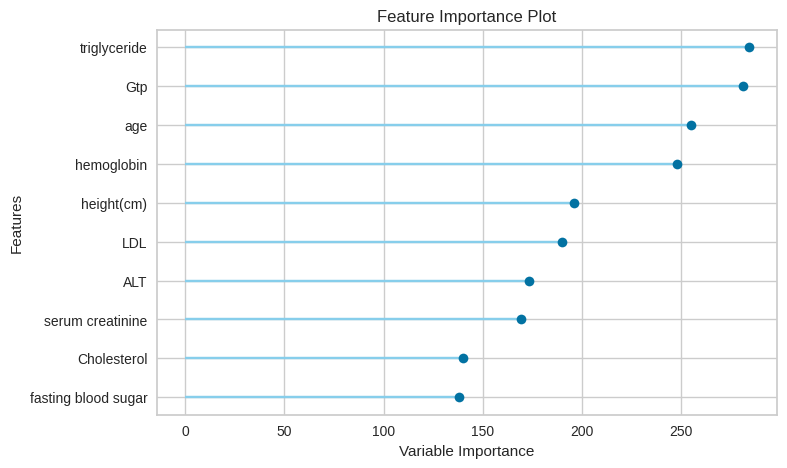

In [21]:
plot_model(best_model,plot='feature')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
train_df=df

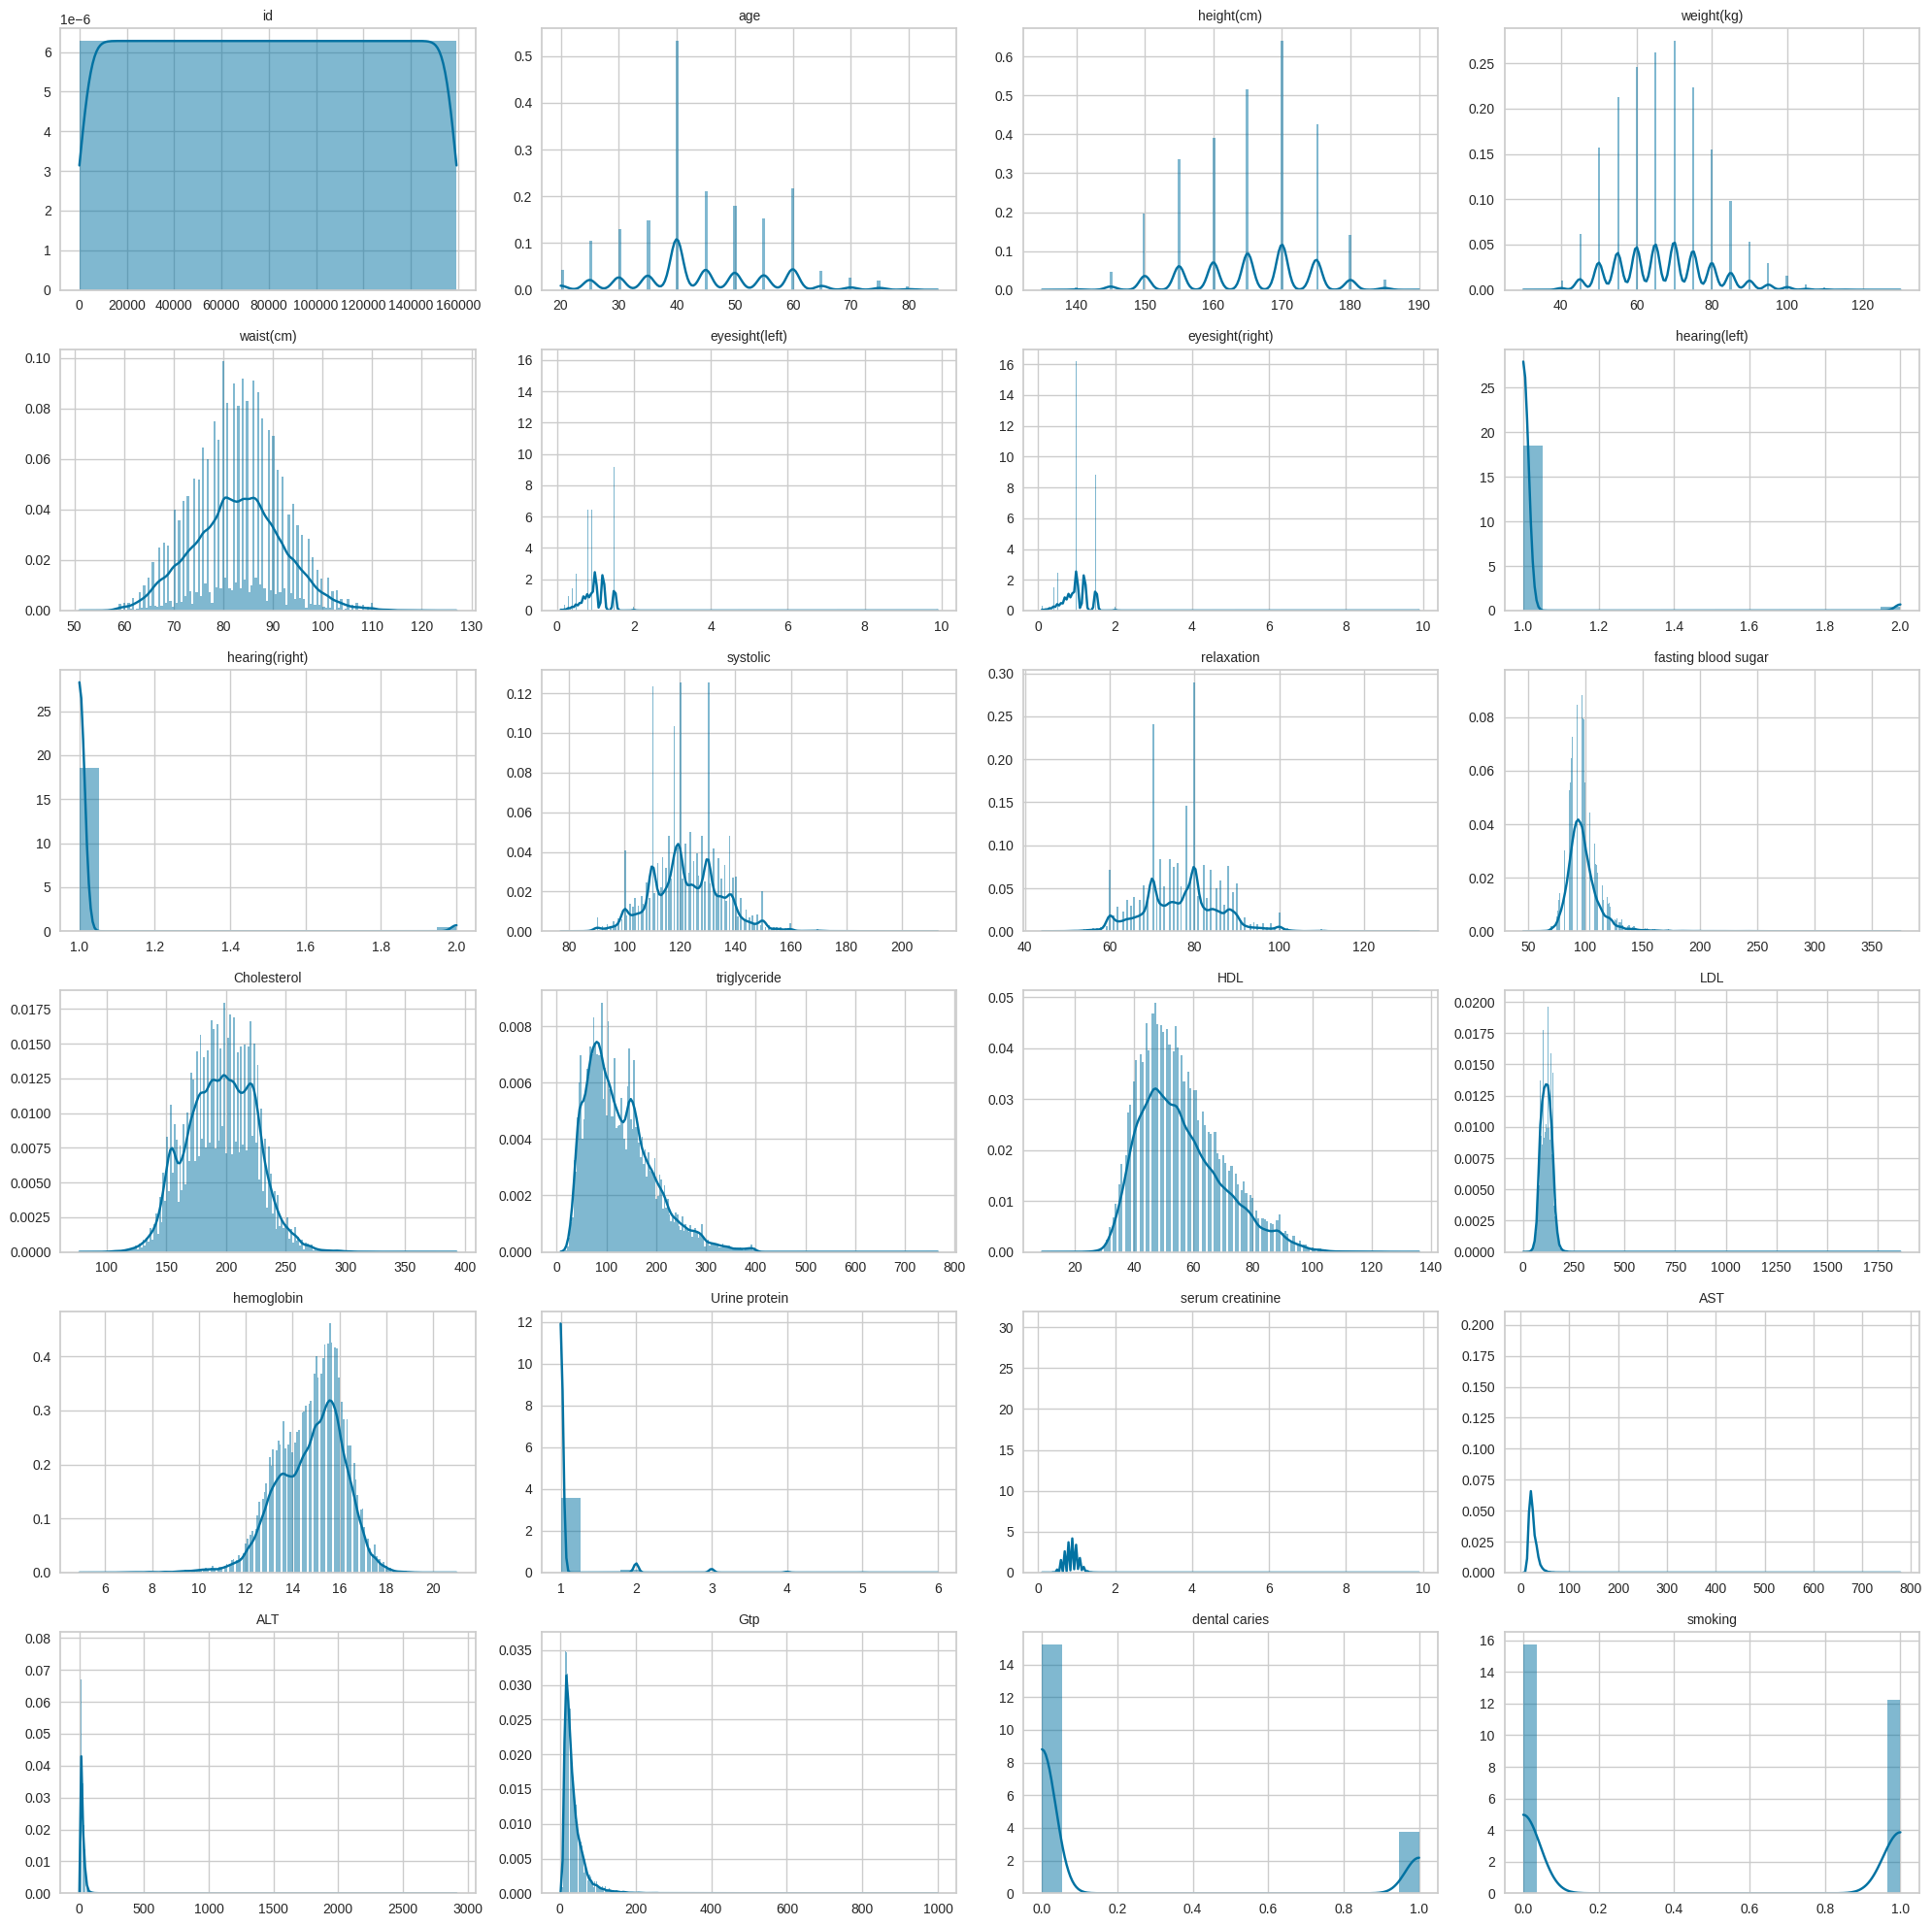

In [28]:
# Define the number of rows and columns for subplots
n_rows = 6
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(train_df.columns):
    sns.histplot(train_df[column],
                 ax=axes[i],
                 kde=True,
                 stat="density",
                 linewidth=0)
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [9]:
x=df.drop('smoking', axis=1)
y=df[["smoking"]]

In [10]:
model=Sequential()
model.add(Dense(23,activation='relu')) #sütun sayısı 24 olduğu için 24 ie başladık.24 nörona bağladık demektir
model.add(Dense(150,activation='relu')) #1500 nörona bağladık
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #sigmoid = sonucu 1 veya 0 olacağı için bu aktivasyon kodu kullandık
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

#entropy=kaos
#adam= fonksiyon  duruma göre atacağı adımları ayarlıyor
#accuracy= classification da başarı oranı
#r2=rgression da başarı oranı
#siluette score= clustring başarı oranı
#loss=gerçek değer ile tahmin edilen arasındaki fark büyükse bu katsayıları update ederek hatayı 0 a  eşitlemeye çalışıyor

# autokeras.com ile hepsni otomatik olarak kendi yapıyor

In [11]:
model.fit(x,y,epochs=100,batch_size=100,verbose=1)
#batch_size=32 bir seferde 32 satır işleniyor demek
#verbose=0 olursa satırları göstermeden sonucu gösterir. 1 olsa adım adım gösteriyor

Epoch 1/100
1593/1593 [==============================] - 5s 2ms/step - loss: 25.9860 - accuracy: 0.5150
Epoch 2/100
1593/1593 [==============================] - 3s 2ms/step - loss: 2.6719 - accuracy: 0.5532
Epoch 3/100
1593/1593 [==============================] - 3s 2ms/step - loss: 1.2905 - accuracy: 0.5748
Epoch 4/100
1593/1593 [==============================] - 4s 2ms/step - loss: 0.7281 - accuracy: 0.6030
Epoch 5/100
1593/1593 [==============================] - 3s 2ms/step - loss: 1.5820 - accuracy: 0.5945
Epoch 6/100
1593/1593 [==============================] - 4s 2ms/step - loss: 0.7937 - accuracy: 0.5628
Epoch 7/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6739 - accuracy: 0.5859
Epoch 8/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6667 - accuracy: 0.5981
Epoch 9/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5760
Epoch 10/100
1593/1593 [==============================] - 3s 2ms/step - 

1593/1593 [==============================] - 3s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 80/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 81/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 82/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 83/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 84/100
1593/1593 [==============================] - 3s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 85/100
1593/1593 [==============================] - 4s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 86/100
1593/1593 [==============================] - 4s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 87/100
1593/1593 [==============================] - 4s 2ms/step - loss: 0.6853 - accuracy: 0.5626
Epoch 88/100
1593/1593 [==============================] - 4s 2ms/step - loss:

In [12]:
score=model.evaluate(x,y)

4977/4977 [==============================] - 6s 1ms/step - loss: 0.6853 - accuracy: 0.5626
